# Metadata

```yaml
Course:   DS 5001
Module:   10 Lab
Topic:    Doc2Vec
Author:   R.C. Alvarado
Date:     02 April 2023 (revised)
```

**Purpose:** Demonstrate use of Gensim's doc2vec implementation.

See https://www.tutorialspoint.com/gensim/gensim_doc2vec_model.htm#

> Doc2Vec model, as opposite to Word2Vec model, is used to create a vectorised representation of a group of words taken collectively as a single unit. It doesn’t only give the simple average of the words in the sentence.



# Set Up

In [44]:
data_path = "../data"
corpus_prefix = 'austen-melville'
OHCO = ['book_id','chap_id','para_num','sent_num','token_num']
BAG = OHCO[:1] # BOOKS

In [45]:
import pandas as pd
import numpy as np
import gensim

# Get Data

In [46]:
LIB = pd.read_csv(f"{data_path}/output/{corpus_prefix}-LIB.csv").set_index(['book_id'])
LIB['author_id'] = LIB.author.str.split(', ').str[0]
LIB['book_label'] = LIB.author_id + ' ' + LIB.index.astype('str') + ': ' + LIB.title.str[:20]

In [47]:
CORPUS = pd.read_csv(f"{data_path}/output/{corpus_prefix}-CORPUS.csv").set_index(OHCO)[['pos','term_str']]

In [48]:
DOCS = CORPUS.groupby(BAG)

In [49]:
DOCIDX = DOCS.term_str.count().index

# Convert to Gensim

We follow Gensim recipe for converting our data from a dataframe to a TaggedDocument.

In [50]:
data = DOCS.term_str.apply(lambda x: list(x)).to_list()

In [51]:
def tagged_document(list_of_list_of_words):
    for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument([str(w) for w in list_of_words], [i])

In [52]:
data_for_training = list(tagged_document(data))

In [53]:
# data_for_training[:1]

# Generate Model

In [54]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)

In [55]:
model.build_vocab(data_for_training)

In [56]:
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

# Try Out

In [57]:
r1 = model.infer_vector("I went sailing on the Pacific".split())
r2 = model.infer_vector("I so enjoyed the visit to Bath".split())

In [71]:
R = pd.DataFrame(dict(r1=r1, r2=r2))

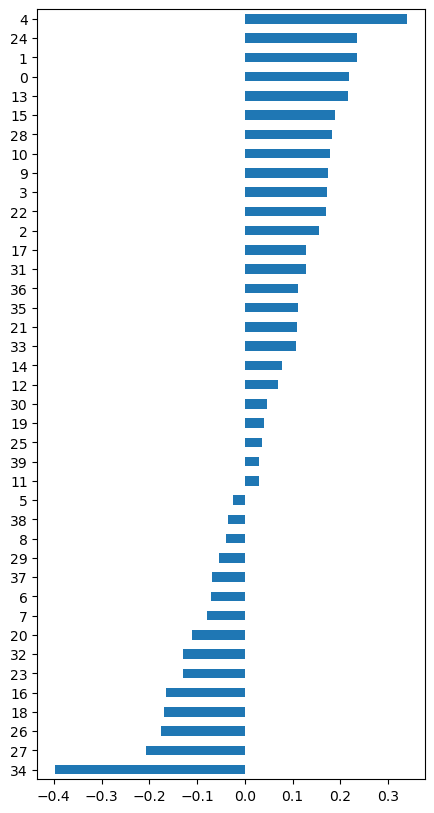

In [82]:
(R.r1 - R.r2).sort_values().plot.barh(figsize=(5,10));

In [81]:
R.style.background_gradient(cmap='YlGnBu', axis=None)

,r1,r2
0,-0.006017,-0.224642
1,0.064960,-0.168732
2,0.160570,0.005209
3,-0.094474,-0.266655
4,-0.174894,-0.514973
5,-0.061725,-0.036292
6,-0.056637,0.013900
7,0.034410,0.114602
8,-0.050357,-0.010553
9,0.138122,-0.036750


# Document Embedding Matrix

In [83]:
# model.docvecs.vectors_docs

In [84]:
X = pd.DataFrame(model.docvecs.vectors_docs, index=LIB.book_label)

In [85]:
import sys
sys.path.append("../lib")
from hac2 import HAC

<Figure size 640x480 with 0 Axes>

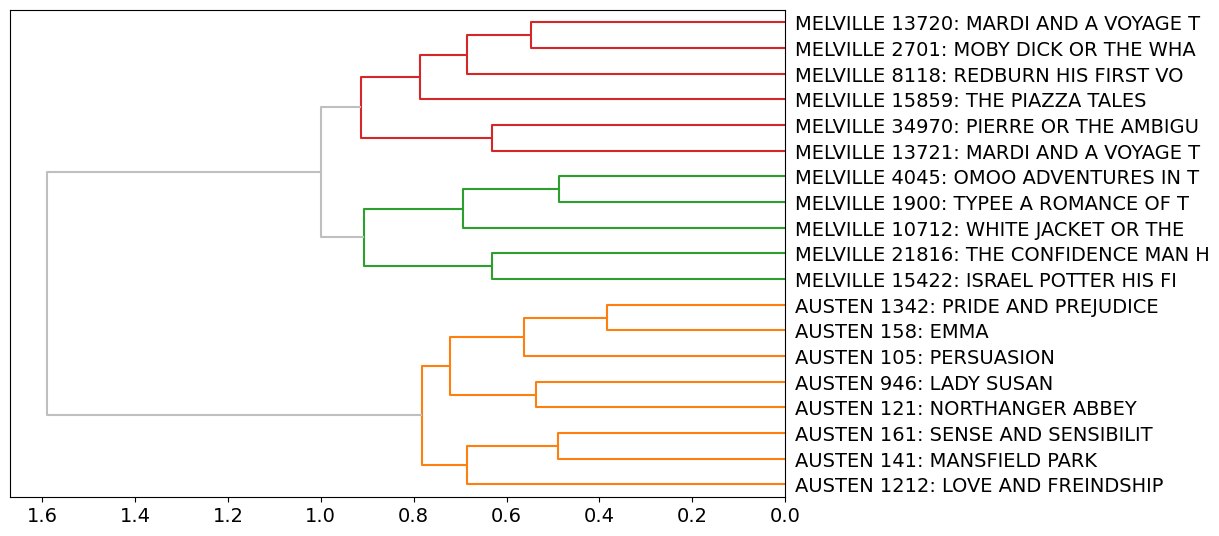

In [86]:
# dv_tree = HAC(X)
dv_tree.color_thresh = 1
dv_tree.plot()

In [ ]:
mode